Libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import os
from torch import nn
from torch.utils.data import DataLoader
import torch.nn.functional as F

Creating the datasets

First function 

In [20]:
%%latex
\(f_1(x):=xx-yy\)

<IPython.core.display.Latex object>

In [21]:
def f1(x, y):
    return x*x-y*y

x and y lists

In [25]:
x=np.linspace(-10**(2), 10**(2), 10**(4))
y=np.linspace(-10**(2), 10**(2), 10**(4))

plot of f1

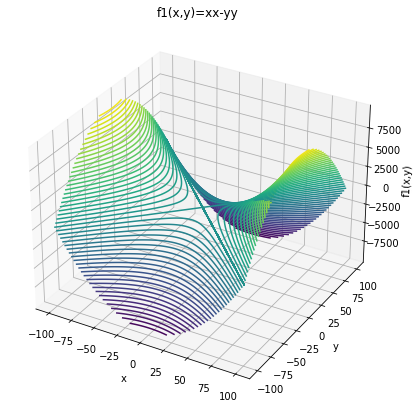

In [26]:
X, Y = np.meshgrid(x, y)
Z = f1(X, Y)
fig = plt.figure(figsize =[10,7])
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f1(x,y)')
ax.set_title('f1(x,y)=xx-yy')
plt.savefig('figures/f1_plot')
plt.show()

Creating a DataFrame

Random shuffling x and y in order to have non-zero values for f1(x,y)

In [ ]:
x1=x.copy()
y1=y.copy()
np.random.shuffle(x1)
np.random.shuffle(y1.copy())


x1 and y1 visualisation 

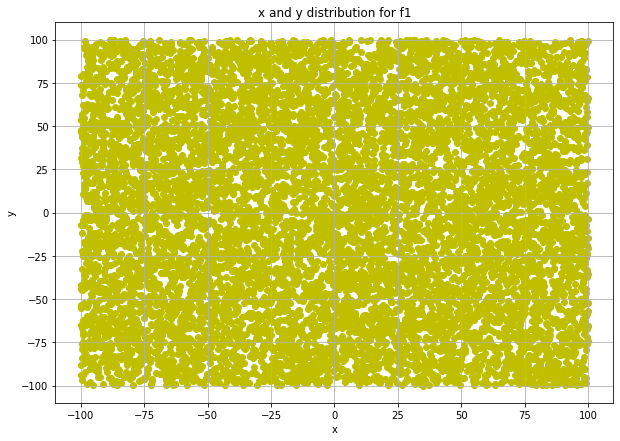

In [ ]:
plt.figure(figsize=[10,7])
plt.title('x and y distribution for f1')
plt.scatter(x1,y1, color='y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.savefig('figures/shuffled_x_y_f1')
plt.show()



Saving the data to a pandas dataFrame format

In [ ]:
data_array_f1={'x':x1, 'y':y1, 'f1(x,y)': f1(x1,y1)}
data_frame_f1=pd.DataFrame(data_array_f1, columns=['x', 'y', 'f1(x,y)'])
data_frame_f1.to_csv('datasets/f1_dataset.csv')

Now that we have a dataset ready to be explored, we implement our Neural Network

Try f1 approximation using 1 layer with 2 neurons 

In [ ]:
# defining NN architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_features, h1, h2):
        super(NeuralNetwork, self).__init__()
        self.layer1=nn.Linear(input_features, 2)
        self.output=nn.Linear(2,1)
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x=self.
        return logits

In [ ]:
from torch.utils.data import Dataset
from sklearn.preprocessing import StandardScaler

In [ ]:
class FeatureDataset(Dataset):

    def __init__(self,file_name):
        # read csv file and load row data into variables
        file_out = pd.read_csv(file_name)
        x = "Put x,y values from the data frame"
        y = "Put f(x,y) values from the dataframe"

        #Feature scaling
        sc = StandardScaler()
        x_train = sc.fit_transform(x)
        y_train = y

        # converting to torch tensors
        self.x_train = torch.tensor(x_train, dtype=torch.float32)
        self.y_train = torch.tensor(y_train, dtype=torch.float32)


    def __len__(self):
        return len(self.y_train)

    def __getitem__(self, idx):
        return self.x_train[idx], self.y_train[idx]

In [ ]:
#defining the mmodel
model = NeuralNetwork().to('cpu')
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2, out_features=1, bias=True)
  )
)


In [ ]:
# define loss func and optimizer
loss_func = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.003)

In [ ]:
from torch.ppg_feature_dataset import FeatureDataset

ModuleNotFoundError: No module named 'torch.ppg_feature_dataset'

In [ ]:
from tqdm import tqdm

In [ ]:
# train
epochs = 5
for e in range(epochs):
    running_loss = 0
    # batch training
    for features, labels in train_loader:

        # forward pass
        output = model(features)
        loss = loss_func(output, labels)

        optimizer.zero_grad() # clear previous gradients
        loss.backward() # backward pass
        optimizer.step()

        running_loss += loss.item()
else:
    print(loss.item())